# Name: <font color= red>Adam Sturisky, Maxwell Mahieu, Cole Phillips</font>

# 1. Loading and Preparing the Data

In [69]:
import re

def category_splitter(text):
    if isinstance(text, str):
        match = re.match(r'([^/]*)/([^/]*)/(.*)', text)
        if match:
            return match.groups()
        else:
            return ("No Label", "No Label", "No Label")
    else:
        return ("No Label", "No Label", "No Label")

In [180]:
import pandas as pd
data = pd.read_csv("train.tsv", sep='\t', converters={'category_name': category_splitter})
data.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,"(Men, Tops, T-shirts)",NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,"(Electronics, Computers & Tablets, Components ...",Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,"(Women, Tops & Blouses, Blouse)",Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,"(Home, Home Décor, Home Décor Accents)",NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,"(Women, Jewelry, Necklaces)",NaN,44.0,0,Complete with certificate of authenticity


In [71]:
data.isnull().any()

train_id             False
name                 False
item_condition_id    False
category_name        False
brand_name            True
price                False
shipping             False
item_description      True
dtype: bool

In [72]:
# Replace null values with 'NA' in the category name columns
data['cat_name'] = data['category_name'].str.get(0).fillna('NA').astype('category')
data['subcat1_name'] = data['category_name'].str.get(1).fillna('NA').astype('category')
data['subcat2_name'] = data['category_name'].str.get(2).fillna('NA').astype('category')

# Drop the original category_name column
data.drop('category_name', axis=1, inplace=True)

data['item_description'].fillna('NA', inplace=True)
data['brand_name'] = data['brand_name'].fillna('NA').astype('category')

# View the first few rows of the data
data.head()


,train_id,name,item_condition_id,brand_name,price,shipping,item_description,cat_name,subcat1_name,subcat2_name
0,0,MLB Cincinnati Reds T Shirt Size XL,3,NA,10.0,1,No description yet,Men,Tops,T-shirts
1,1,Razer BlackWidow Chroma Keyboard,3,Razer,52.0,0,This keyboard is in great condition and works ...,Electronics,Computers & Tablets,Components & Parts
2,2,AVA-VIV Blouse,1,Target,10.0,1,Adorable top with a hint of lace and a key hol...,Women,Tops & Blouses,Blouse
3,3,Leather Horse Statues,1,NA,35.0,1,New with tags. Leather horses. Retail for [rm]...,Home,Home Décor,Home Décor Accents
4,4,24K GOLD plated rose,1,NA,44.0,0,Complete with certificate of authenticity,Women,Jewelry,Necklaces


In [73]:
#ensure we captured all NaN values
data.isnull().any()

train_id             False
name                 False
item_condition_id    False
brand_name           False
price                False
shipping             False
item_description     False
cat_name             False
subcat1_name         False
subcat2_name         False
dtype: bool

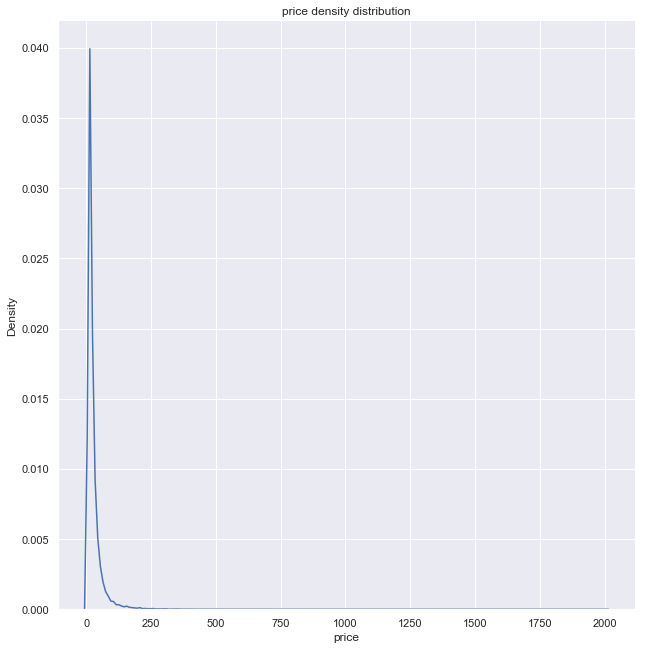

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a FacetGrid with the data and height of 9 inches
g = sns.FacetGrid(data, height=9)

# Map a density plot of the 'price' column
g.map(sns.kdeplot, "price")

# Add a legend
g.add_legend()

# Set the title of the plot
plt.title('price density distribution')

# Show the plot
plt.show()


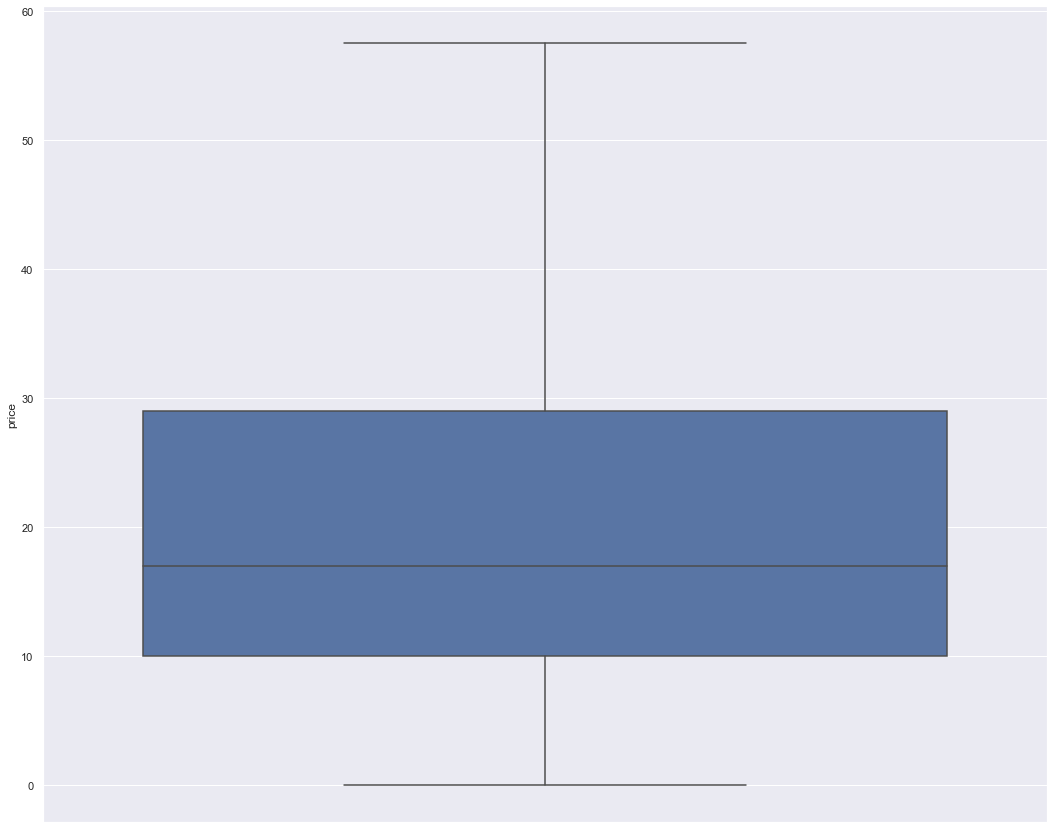

In [75]:
#Box plot to show the price distribution of most of the items 
sns.boxplot(y='price', data=data, showfliers=False)
plt.show()

In [76]:
# List of columns to convert to lowercase
columns = ['name', 'brand_name', 'item_description', 'cat_name', 'subcat1_name', 'subcat2_name']

# Convert the specified columns to lowercase
for column in columns:
    data[column] = data[column].str.lower()

In [77]:
# List of columns to remove non-alphabetic characters from
columns = ['name', 'brand_name', 'item_description', 'cat_name', 'subcat1_name', 'subcat2_name']

# Remove non-alphabetic characters from the specified columns
for column in columns:
    data[column] = data[column].str.replace('[^A-Za-z]', ' ', regex=True)

In [78]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize as wt


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\colet\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [79]:
#List of columns to apply the 'wt' function to
columns = ['name', 'brand_name', 'item_description', 'cat_name', 'subcat1_name', 'subcat2_name']

# # Apply the 'wt' function to the specified columns
for column in columns:
     data[column] = data[column].apply(wt)

data.head()

,train_id,name,item_condition_id,brand_name,price,shipping,item_description,cat_name,subcat1_name,subcat2_name
0,0,"[mlb, cincinnati, reds, t, shirt, size, xl]",3,[na],10.0,1,"[no, description, yet]",[men],[tops],"[t, shirts]"
1,1,"[razer, blackwidow, chroma, keyboard]",3,[razer],52.0,0,"[this, keyboard, is, in, great, condition, and...",[electronics],"[computers, tablets]","[components, parts]"
2,2,"[ava, viv, blouse]",1,[target],10.0,1,"[adorable, top, with, a, hint, of, lace, and, ...",[women],"[tops, blouses]",[blouse]
3,3,"[leather, horse, statues]",1,[na],35.0,1,"[new, with, tags, leather, horses, retail, for...",[home],"[home, d, cor]","[home, d, cor, accents]"
4,4,"[k, gold, plated, rose]",1,[na],44.0,0,"[complete, with, certificate, of, authenticity]",[women],[jewelry],[necklaces]


In [80]:
#4 Remove Stop Words
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\colet\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [81]:
def remove_stops(x):
    stop_wrds = stopwords.words('english')
    temp = []
    for word in x:
        if word not in stop_wrds:
            temp.append(word)
    return temp

data['item_description'] = data['item_description'].apply(remove_stops)

In [82]:
from nltk.stem.porter import PorterStemmer

def stem_it(x):
    stemmer = PorterStemmer()
    return [stemmer.stem(w) for w in x]

data['item_description'] = data['item_description'].apply(stem_it) 

In [83]:
data.head()

,train_id,name,item_condition_id,brand_name,price,shipping,item_description,cat_name,subcat1_name,subcat2_name
0,0,"[mlb, cincinnati, reds, t, shirt, size, xl]",3,[na],10.0,1,"[descript, yet]",[men],[tops],"[t, shirts]"
1,1,"[razer, blackwidow, chroma, keyboard]",3,[razer],52.0,0,"[keyboard, great, condit, work, like, came, bo...",[electronics],"[computers, tablets]","[components, parts]"
2,2,"[ava, viv, blouse]",1,[target],10.0,1,"[ador, top, hint, lace, key, hole, back, pale,...",[women],"[tops, blouses]",[blouse]
3,3,"[leather, horse, statues]",1,[na],35.0,1,"[new, tag, leather, hors, retail, rm, stand, f...",[home],"[home, d, cor]","[home, d, cor, accents]"
4,4,"[k, gold, plated, rose]",1,[na],44.0,0,"[complet, certif, authent]",[women],[jewelry],[necklaces]


In [84]:
# List of columns to join with a space
columns = ['name', 'brand_name', 'item_description', 'cat_name', 'subcat1_name', 'subcat2_name']

# Join the specified columns with a space
for column in columns:
    data[column] = data[column].str.join(' ')

# View the first few rows of the data
data.head()


,train_id,name,item_condition_id,brand_name,price,shipping,item_description,cat_name,subcat1_name,subcat2_name
0,0,mlb cincinnati reds t shirt size xl,3,na,10.0,1,descript yet,men,tops,t shirts
1,1,razer blackwidow chroma keyboard,3,razer,52.0,0,keyboard great condit work like came box port ...,electronics,computers tablets,components parts
2,2,ava viv blouse,1,target,10.0,1,ador top hint lace key hole back pale pink x a...,women,tops blouses,blouse
3,3,leather horse statues,1,na,35.0,1,new tag leather hors retail rm stand foot high...,home,home d cor,home d cor accents
4,4,k gold plated rose,1,na,44.0,0,complet certif authent,women,jewelry,necklaces


In [85]:
data.to_csv('train_dataF1.csv')

In [86]:
data.cat_name.describe()

count     1482535
unique         11
top         women
freq       664385
Name: cat_name, dtype: object

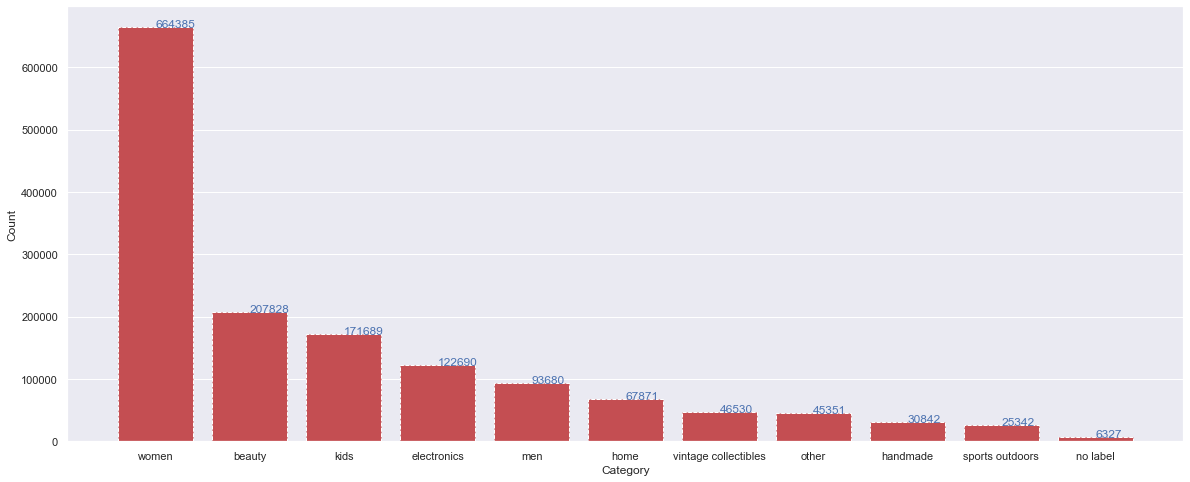

In [87]:
# Import the Counter class from the collections module
from collections import Counter

# Count the number of occurrences of each category
cat_count = Counter(list(data.cat_name.values))

# Get the 15 most common categories and their counts
x, y = zip(*cat_count.most_common(15))

# Create a figure with a vertical bar plot
plt.figure(figsize=[20, 8])
plt.bar(x, y, color='r', linestyle='--')

# Add labels to the bars
for i, val in enumerate(y):
    plt.annotate(val, (x[i], y[i]), color='b')

# Set the y-axis label
plt.ylabel('Count')

# Set the x-axis label
plt.xlabel('Category')

# Hide the grid lines on the x-axis
plt.grid(False, axis='x')

# Show the plot
plt.show()


In [88]:
data.subcat1_name.describe()

count              1482535
unique                 114
top       athletic apparel
freq                134383
Name: subcat1_name, dtype: object

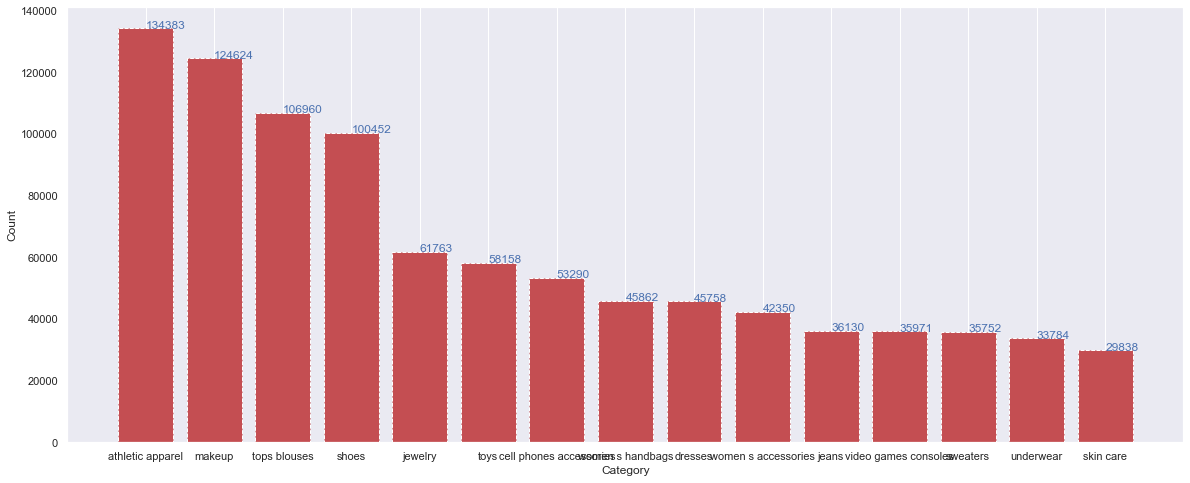

In [89]:
# Import the Counter class from the collections module
from collections import Counter

# Count the number of occurrences of each subcategory
subcat1_count = Counter(list(data.subcat1_name.values))

# Get the 15 most common subcategories and their counts
x, y = zip(*subcat1_count.most_common(15))


# Create a figure with a vertical bar plot
plt.figure(figsize=[20, 8])
plt.bar(x, y, color='r', linestyle='--')

# Add labels to the bars
for i, val in enumerate(y):
    plt.annotate(val, (x[i], y[i]), color='b')

# Set the y-axis label
plt.ylabel('Count')

# Set the x-axis label
plt.xlabel('Category')

# Hide the grid lines on the x-axis
plt.grid(False, axis='y')

# Show the plot
plt.show()


In [90]:
data.subcat2_name.describe()

count      1482535
unique         870
top       t shirts
freq         61488
Name: subcat2_name, dtype: object

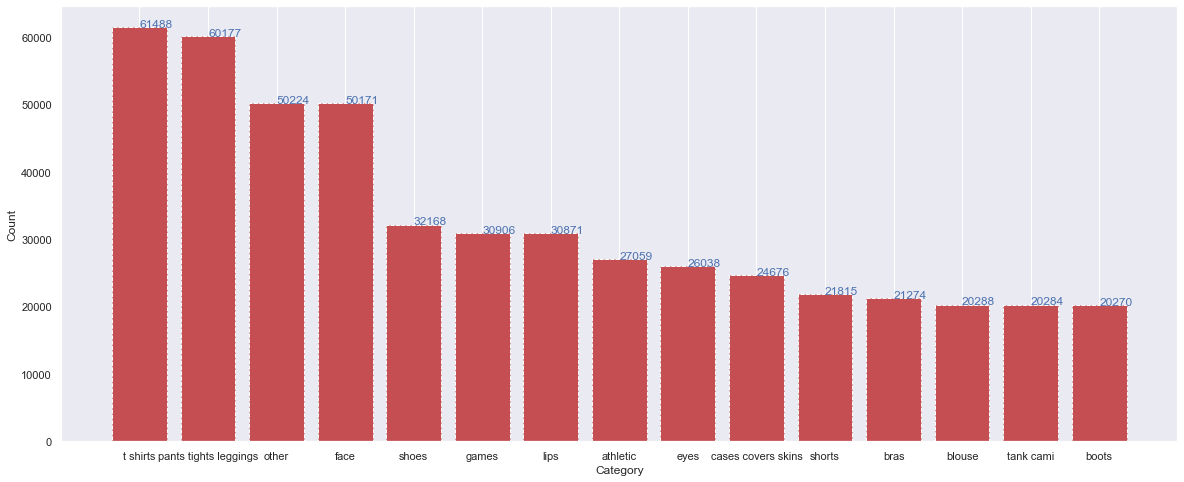

In [91]:
# Import the Counter class from the collections module
from collections import Counter

# Count the number of occurrences of each subcategory
subcat2_count = Counter(list(data.subcat2_name.values))

# Get the 15 most common subcategories and their counts
x, y = zip(*subcat2_count.most_common(15))


# Create a figure with a vertical bar plot
plt.figure(figsize=[20, 8])
plt.bar(x, y, color='r', linestyle='--')

# Add labels to the bars
for i, val in enumerate(y):
    plt.annotate(val, (x[i], y[i]), color='b')

# Set the y-axis label
plt.ylabel('Count')

# Set the x-axis label
plt.xlabel('Category')

# Hide the grid lines on the x-axis
plt.grid(False, axis='y')

# Show the plot
plt.show()


In [92]:
data.brand_name.describe()

count     1482535
unique       4790
top            na
freq       632682
Name: brand_name, dtype: object

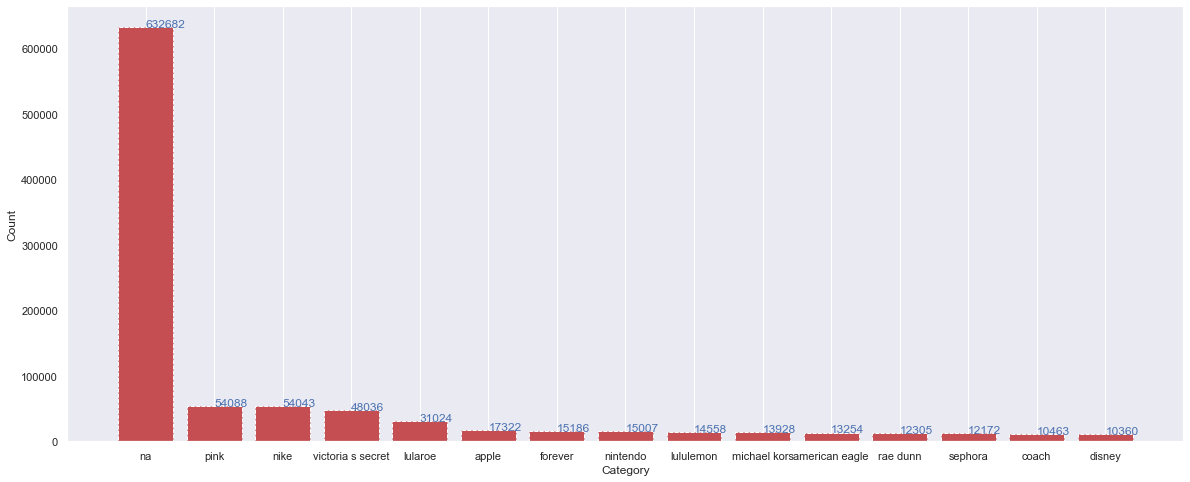

In [93]:
# Import the Counter class from the collections module
from collections import Counter

# Count the number of occurrences of each brand
brand_count = Counter(list(data.brand_name.values))

# Get the 15 most common subcategories and their counts
x, y = zip(*brand_count.most_common(15))


# Create a figure with a vertical bar plot
plt.figure(figsize=[20, 8])
plt.bar(x, y, color='r', linestyle='--')

# Add labels to the bars
for i, val in enumerate(y):
    plt.annotate(val, (x[i], y[i]), color='b')

# Set the y-axis label
plt.ylabel('Count')

# Set the x-axis label
plt.xlabel('Category')

# Hide the grid lines on the x-axis
plt.grid(False, axis='y')

# Show the plot
plt.show()



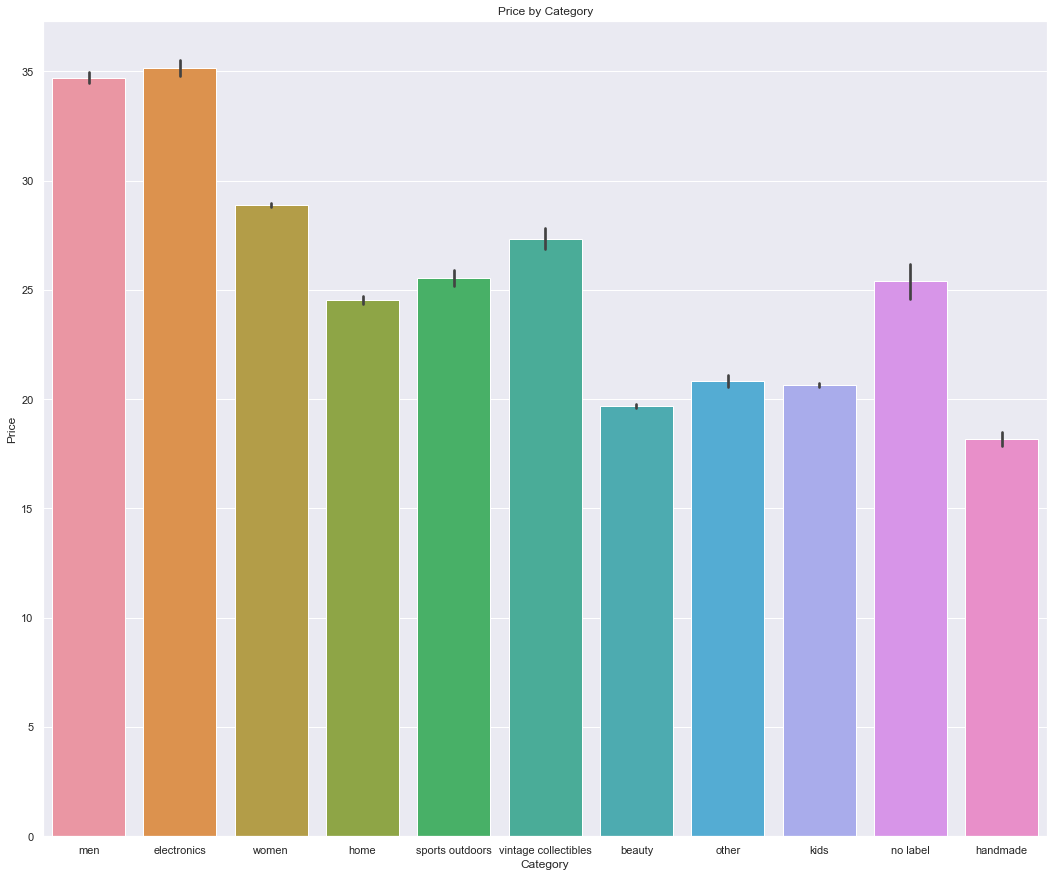

In [94]:
#mean price
# Import the seaborn module
import seaborn as sns

sns.set(rc={'figure.figsize':(18,15)})

# Create a bar plot showing the mean price for each category
sns.barplot(x='cat_name', y='price', data=data)

# Add a title to the plot
plt.title('Price by Category')

# Set the y-axis label
plt.ylabel('Price')

# Set the x-axis label
plt.xlabel('Category')

# Show the plot
plt.show()


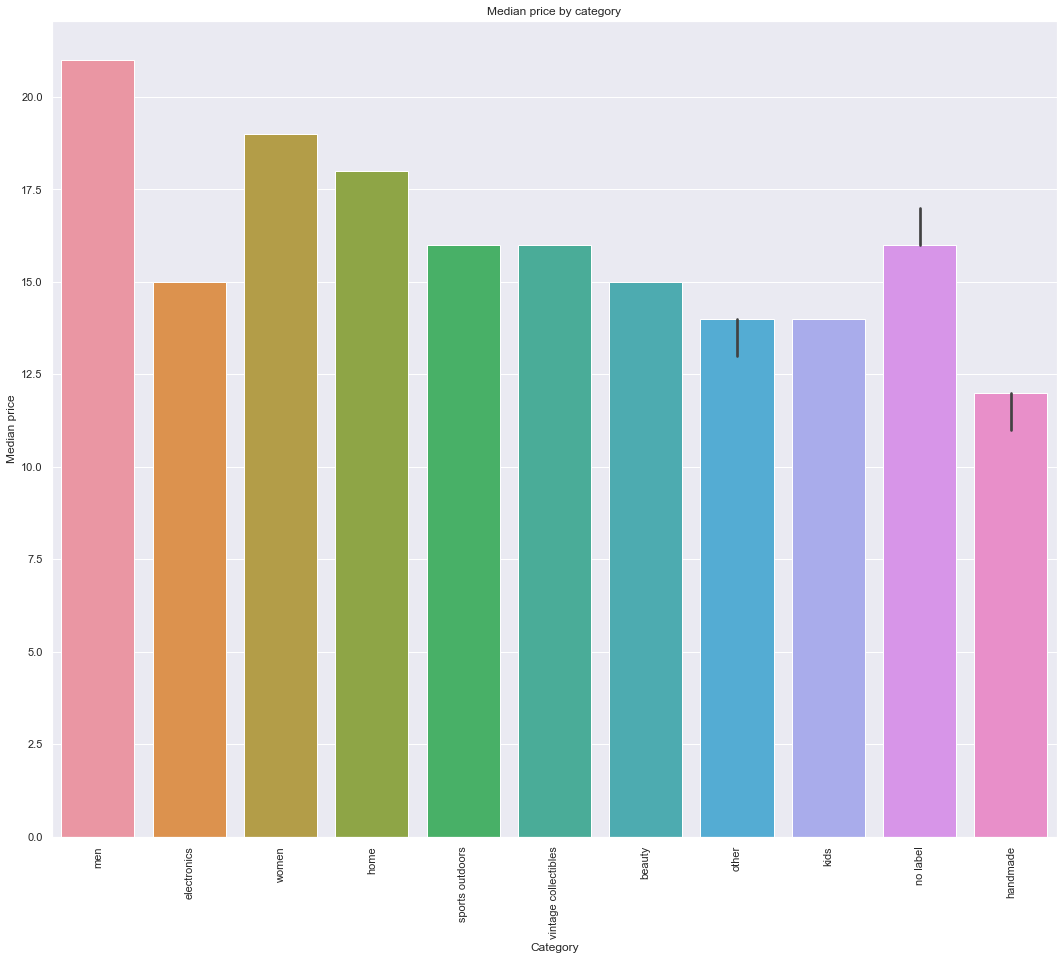

In [95]:
import numpy as np 
#median price
# Create a bar plot showing the median price for each category
sns.barplot(x='cat_name', y='price', data=data, estimator=np.median)

# Add a title to the plot
plt.title('Median price by category')

# Set the x-axis label
plt.xlabel('Category')

# Set the y-axis label
plt.ylabel('Median price')

# Rotate the x-axis labels by 90 degrees to make them easier to read
plt.xticks(rotation=90)

# Show the plot
plt.show()


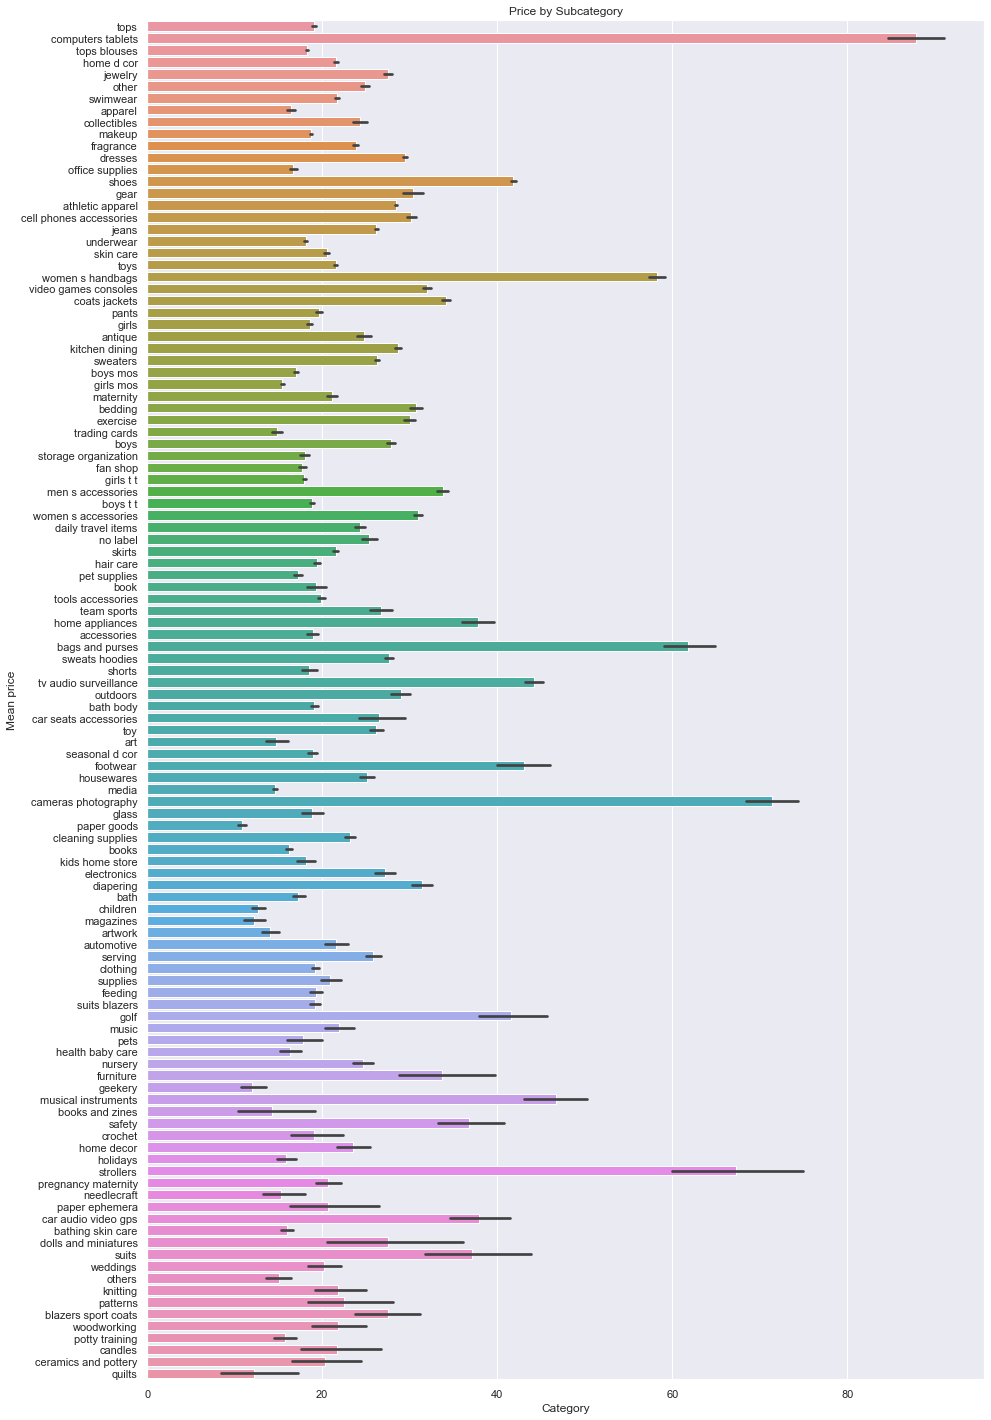

In [96]:
# Create a figure with a specified size
plt.figure(figsize=(15, 25))

# Create a bar plot showing the mean price for each subcategory
sns.barplot(x='price', y='subcat1_name', data=data)

# Add a title to the plot
plt.title('Price by Subcategory')

# Set the x-axis label
plt.xlabel('Category')

# Set the y-axis label
plt.ylabel('Mean price')

# Show the plot
plt.show()

In [97]:
# List of groupby transformations
groupby_transforms = [('cat_name', 'cat_mean_price'),
                      ('subcat1_name', 'subcat1_mean_price'),
                      ('subcat2_name', 'subcat2_mean_price'),
                      ('brand_name', 'brand_mean_price')]

# Loop through the groupby transformations
for groupby, transform in groupby_transforms:
    # Apply the groupby transformation
    data[transform] = data.groupby(groupby)['price'].transform('mean')

# View the data
data.head()


,train_id,name,item_condition_id,brand_name,price,shipping,item_description,cat_name,subcat1_name,subcat2_name,cat_mean_price,subcat1_mean_price,subcat2_mean_price,brand_mean_price
0,0,mlb cincinnati reds t shirt size xl,3,na,10.0,1,descript yet,men,tops,t shirts,34.708614,18.999442,19.132156,21.133453
1,1,razer blackwidow chroma keyboard,3,razer,52.0,0,keyboard great condit work like came box port ...,electronics,computers tablets,components parts,35.173922,87.887754,42.913900,45.021277
2,2,ava viv blouse,1,target,10.0,1,ador top hint lace key hole back pale pink x a...,women,tops blouses,blouse,28.885496,18.237514,15.659676,15.047109
3,3,leather horse statues,1,na,35.0,1,new tag leather hors retail rm stand foot high...,home,home d cor,home d cor accents,24.536599,21.566301,22.185020,21.133453
4,4,k gold plated rose,1,na,44.0,0,complet certif authent,women,jewelry,necklaces,28.885496,27.501571,25.587509,21.133453


In [98]:
data1 = data.drop(columns=['train_id', 'name', 'brand_name', 'price', 'item_description', 'cat_name', 'subcat1_name', 'subcat2_name'])
data1.head()

,item_condition_id,shipping,cat_mean_price,subcat1_mean_price,subcat2_mean_price,brand_mean_price
0,3,1,34.708614,18.999442,19.132156,21.133453
1,3,0,35.173922,87.887754,42.913900,45.021277
2,1,1,28.885496,18.237514,15.659676,15.047109
3,1,1,24.536599,21.566301,22.185020,21.133453
4,1,0,28.885496,27.501571,25.587509,21.133453


In [35]:
data1.to_csv('train_dataF2')

In [105]:
data.head()

,train_id,name,item_condition_id,brand_name,price,shipping,item_description,cat_name,subcat1_name,subcat2_name,cat_mean_price,subcat1_mean_price,subcat2_mean_price,brand_mean_price
0,0,mlb cincinnati reds t shirt size xl,3,na,10.0,1,descript yet,men,tops,t shirts,34.708614,18.999442,19.132156,21.133453
1,1,razer blackwidow chroma keyboard,3,razer,52.0,0,keyboard great condit work like came box port ...,electronics,computers tablets,components parts,35.173922,87.887754,42.913900,45.021277
2,2,ava viv blouse,1,target,10.0,1,ador top hint lace key hole back pale pink x a...,women,tops blouses,blouse,28.885496,18.237514,15.659676,15.047109
3,3,leather horse statues,1,na,35.0,1,new tag leather hors retail rm stand foot high...,home,home d cor,home d cor accents,24.536599,21.566301,22.185020,21.133453
4,4,k gold plated rose,1,na,44.0,0,complet certif authent,women,jewelry,necklaces,28.885496,27.501571,25.587509,21.133453


# 2. Creating the Models

In [181]:
#creating 80/20 training/testing splits of the data
import numpy as np
from sklearn.model_selection import train_test_split
data['price'] = data['price'].astype(int)
X = data1
y = data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

This is a ridge regression model that is trained on the training data using various values of the alpha hyperparameter. This calculates the root mean squared error along with each corresponding alpha

In [188]:
from sklearn.metrics import mean_squared_error as mse
from math import sqrt
from sklearn.linear_model import Ridge
from tqdm import tqdm

alpha = [1, 2, 3, 4, 5, 6, 7]
rmse_array=[]
for i in tqdm(alpha):
    model = Ridge(solver='sag', random_state=10, alpha=i)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse_array.append(sqrt(mse(y_test, y_pred)))
    
for i in range(len(rmse_array)):
    print('RMSE for alpha = ', alpha[i], 'is', rmse_array[i])
    
best_alpha = np.argmin(rmse_array)

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:48<00:00,  6.95s/it]

RMSE for alpha =  1 is 32.79139657668213
RMSE for alpha =  2 is 32.79139658549514
RMSE for alpha =  3 is 32.791396594311735
RMSE for alpha =  4 is 32.791396603130956
RMSE for alpha =  5 is 32.7913966119534
RMSE for alpha =  6 is 32.79139662077902
RMSE for alpha =  7 is 32.7913966296077


This is a support vector regression (SVR) mdoel with different values of the regularization parameter 'c' and evaluates the performance of each model using root mean squared log error (RMSLE).

The model trains an 'SVR' model using each value of 'c', and it calculates the RMSLE for each model. The model with the lowest RMSLE is chosen.

In [189]:
from sklearn.svm import SVR

c_range =[0.01, 0.025, 0.1, 0.25, .5, .75, 1, 2.5, 5, 10]
rmsle_array = []

for i in c_range:
    svr_model = SVR(C=i, max_iter=200)
    svr_model.fit(X_train, y_train)
    y_preds = svr_model.predict(X_test)
    err = sqrt(mse(y_test, y_pred))
    rmsle_array.append(err)
    
    print('RMSLE for C=',i, 'is', err)
    
best_C = np.argmin(rmsle_array)

C:\Users\colet\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


RMSLE for C= 0.01 is 32.7913966296077


C:\Users\colet\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


RMSLE for C= 0.025 is 32.7913966296077


C:\Users\colet\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


RMSLE for C= 0.1 is 32.7913966296077


C:\Users\colet\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


RMSLE for C= 0.25 is 32.7913966296077


C:\Users\colet\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


RMSLE for C= 0.5 is 32.7913966296077


C:\Users\colet\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


RMSLE for C= 0.75 is 32.7913966296077


C:\Users\colet\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


RMSLE for C= 1 is 32.7913966296077


C:\Users\colet\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


RMSLE for C= 2.5 is 32.7913966296077


C:\Users\colet\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


RMSLE for C= 5 is 32.7913966296077


C:\Users\colet\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


RMSLE for C= 10 is 32.7913966296077


This creates a neural network model using TensorFlow. The model has 3 layers: a Dense layer with 16 nodes and a relu activation function, a second Dense layer with 16 nodes and a relu activation function, and a third Dense layer with 1 node.

The model is trained using the X_train and Y_train and the number of epochs (10) as arguments. An epoch is a single iteration over the entire training data.

Lastly, the trained model is used to make predictions on the test data and predictions are stored in the 'tf_pred' variable.

In [190]:
#creating a nueral network model to make predictions 
import tensorflow as tf

tf_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(16, activation='relu', input_dim=X_train.shape[1]),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1)
])

tf_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

tf_model.fit(X_train, y_train, epochs=10)

tf_pred = tf_model.predict(X_test)

Epoch 1/10
37064/37064 [==============================] - 35s 922us/step - loss: 1072.4891 - mae: 14.4302
Epoch 2/10
37064/37064 [==============================] - 32s 857us/step - loss: 1054.1663 - mae: 14.2408
Epoch 3/10
37064/37064 [==============================] - 31s 832us/step - loss: 1049.9562 - mae: 14.1861
Epoch 4/10
37064/37064 [==============================] - 33s 885us/step - loss: 1047.1128 - mae: 14.1681
Epoch 5/10
37064/37064 [==============================] - 35s 948us/step - loss: 1044.7477 - mae: 14.1688
Epoch 6/10
37064/37064 [==============================] - 40s 1ms/step - loss: 1043.6144 - mae: 14.1627
Epoch 7/10
37064/37064 [==============================] - 40s 1ms/step - loss: 1042.3036 - mae: 14.1578
Epoch 8/10
37064/37064 [==============================] - 36s 983us/step - loss: 1041.4713 - mae: 14.1520
Epoch 9/10
37064/37064 [==============================] - 40s 1ms/step - loss: 1041.4495 - mae: 14.1440
Epoch 10/10
9266/9266 [=============================

In [191]:
rmse = mse(y_test, tf_pred)**0.5
print('RMSE',rmse)

RMSE 32.17399830576935


In [192]:
tf_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                112       
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 401
Trainable params: 401
Non-trainable params: 0
_________________________________________________________________


This code uses scikit-learn to train a gradient boosting regression model and perform hyperparameter tuning using grid search cross-validation (5).

The 'best_params_' attribute of the gbr_model_cv object is printed, which returns the set of hyperparameters that produced the best performance on the validation data. The grid search will train and evaluate a total of 8 different combinations of the specified hyperparameters (2 values for n_estimators x 2 values for learning_rate x 2 values for max_depth), and return the set of hyperparameters that produced the best performance on the validation data. These hyperparameters can then be used to train the final gradient boosting model using the entire training set.

In [132]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

gbr_model = GradientBoostingRegressor()
param_grid = {
    'n_estimators':[100, 200],
    'learning_rate': [0.1, 0.05],
    'max_depth': [3, 4]
}

gbr_model_cv = GridSearchCV(gbr_model, param_grid, cv=5)

gbr_model_cv.fit(X_train, y_train)
gb = GradientBoostingRegressor(**gbr_model_cv.best_params_)
gb.fit(X_train, y_train)
gbr_pred = gb.predict(X_test)
mse = mean_squared_error(y_test, gbr_pred)

# Take the square root of the mean squared error to obtain the RMSE
rmse = np.sqrt(mse)

# Print the RMSE
print('RMSE:', rmse)

RMSE: 0.5655855494143759


# The Model We Use

Gradient Boosted Regression Model

In [182]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error as mse
from math import sqrt
from sklearn.linear_model import Ridge
from tqdm import tqdm


gbr_model = GradientBoostingRegressor()
param_grid = {
    'n_estimators':[300],
    'learning_rate': [.1],
    'max_depth': [5]
}

gbr_model_cv = GridSearchCV(gbr_model, param_grid, cv=5)

gbr_model_cv.fit(X_train, y_train)
gb = GradientBoostingRegressor(**gbr_model_cv.best_params_)
gb.fit(X_train, y_train)
gbr_pred = gb.predict(X_test)
mse = mean_squared_error(y_test, gbr_pred)

# Take the square root of the mean squared error to obtain the RMSE
rmse = np.sqrt(mse)

# Print the RMSE
print('RMSE:', rmse)

RMSE: 30.76659852791838


Decision Tree

In [193]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Create a DecisionTreeRegressor object and train it on the training data
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

# Use the trained model to make predictions on the testing data
predictions = model.predict(X_test)

# Calculate root mean squared error
rmse = np.sqrt(mean_squared_error(y_test, predictions))

# Print the RMSE of the model
print("RMSE:", rmse)


RMSE: 31.41364774832417


In [204]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Create a DecisionTreeRegressor object
model = DecisionTreeRegressor()

# Define the hyperparameter grid to search over
param_grid = {'max_depth': [2, 3, 4, 5],
              'min_samples_split': [2, 3, 4, 5],
              'min_samples_leaf': [1, 2, 3, 4]}

# Use GridSearchCV to perform a cross-validation search over the hyperparameter grid
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best
best_params = grid_search.best_params_
print(best_params)

# Use the best hyperparameters to train a new model on the entire training set
model = DecisionTreeRegressor(**best_params)
model.fit(X_train, y_train)

# Calculate the mean squared error on the test set
mse = mean_squared_error(y_test, model.predict(X_test))

# Take the square root of the mean squared error to obtain the RMSE
rmse = np.sqrt(mse)

# Print the RMSE
print("RMSE:", rmse)

{'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 2}
RMSE: 32.43692818311587


Bagged Tree Regression

In [194]:
# Import necessary modules
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import mean_squared_error

# Create a bagged tree regressor
regressor = BaggingRegressor(n_estimators=150)

# Fit the regressor to the training data
regressor.fit(X_train, y_train)

# Predict on the test data
y_pred = regressor.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)

# Calculate root mean squared error
rmse = np.sqrt(mse)

# Print the RMSE of the model
print("RMSE:", rmse)


RMSE: 30.924302063736672


Random Forest with 150 n_estimators and using 2 cv

In [195]:
# Import necessary modules
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Create a random forest regressor
regressor = RandomForestRegressor(n_estimators=150)

# Use 5-fold cross-validation to evaluate the model
cv = 2
scores = cross_val_score(regressor, X, y, cv=cv, scoring="neg_mean_squared_error")

# Calculate root mean squared error
rmse = np.sqrt(-scores.mean())


In [196]:
rmse

31.174302556014343

Gradient Boosting regressor

In [197]:
# Import necessary modules
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Create a gradient boosting regressor
regressor = GradientBoostingRegressor(n_estimators=150)

# Fit the regressor to the training data
regressor.fit(X_train, y_train)

# Predict on the test data
y_pred = regressor.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)

# Calculate root mean squared error
rmse = np.sqrt(mse)

# Print the RMSE of the model
print("RMSE:", rmse)

RMSE: 31.42220196061025


PCA with linear regression

In [198]:
# Import necessary libraries and modules
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Perform PCA on training data
pca = PCA(n_components=6)  # specify the number of principal components to keep
X_train_pca = pca.fit_transform(X_train)

# Train a linear regression model on the training data
model = LinearRegression()
model.fit(X_train_pca, y_train)

# Evaluate the model on the test data
X_test_pca = pca.transform(X_test)
y_pred = model.predict(X_test_pca)


# Calculate the MSE
mse = mean_squared_error(y_test, y_pred)

# Calculate the RMSE
rmse = np.sqrt(mse)

# Calculate the R-squared
r2 = r2_score(y_test, y_pred)

# Print the results
print(f"MSE: {mse:.2f}, RMSE: {rmse:.2f}")
print(f"R2: {r2:.2f}")


MSE: 1075.27, RMSE: 32.79
R2: 0.27


LASSO regression

In [199]:
# Import the Lasso class, the mean_squared_error function, and the numpy sqrt function
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from numpy import sqrt

# Create a Lasso regression model with default parameters
model = Lasso()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Calculate the root mean squared error
rmse = sqrt(mse)
print("Root mean squared error:", rmse)


Root mean squared error: 32.890722004254236


Lasso Regression

In [200]:
from sklearn.metrics import mean_squared_error as mse
from math import sqrt
from sklearn.linear_model import Lasso
from tqdm import tqdm
from sklearn.model_selection import cross_val_score


alpha = [1, 2, 3, 4, 5, 6]
rmse_array=[]
for i in tqdm(alpha):
    model = Lasso( random_state=10, alpha=i)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse_array.append(sqrt(mse(y_test, y_pred)))
   
for i in range(len(rmse_array)):
    print('RMSE for alpha = ', alpha[i], 'is', rmse_array[i])
    
best_alpha = np.argmin(rmse_array)

100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:02<00:00,  2.86it/s]

RMSE for alpha =  1 is 32.890722004254236
RMSE for alpha =  2 is 32.963713643004695
RMSE for alpha =  3 is 33.00734417482321
RMSE for alpha =  4 is 33.015408683637105
RMSE for alpha =  5 is 33.02572173994434
RMSE for alpha =  6 is 33.033803608664165


LASSO w cross validation

In [201]:
from sklearn.model_selection import cross_val_score

alpha = [1, 2, 3, 4, 5, 6]
rmse_array=[]

# Use 5-fold cross-validation to evaluate the model
cv = 15

for i in tqdm(alpha):
    model = Lasso(random_state=10, alpha=i)
    # Use cross_val_score to evaluate the model using RMSE
    scores = cross_val_score(model, X, y, cv=cv, scoring="neg_mean_squared_error")
    rmse_array.append(sqrt(-scores.mean()))

for i in range(len(rmse_array)):
    print('RMSE for alpha = ', alpha[i], 'is', rmse_array[i])
    
best_alpha = np.argmin(rmse_array)


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:48<00:00,  8.13s/it]

RMSE for alpha =  1 is 32.99897519742395
RMSE for alpha =  2 is 33.074246125140206
RMSE for alpha =  3 is 33.11762658171008
RMSE for alpha =  4 is 33.125646674092096
RMSE for alpha =  5 is 33.135925898500304
RMSE for alpha =  6 is 33.14511530817225


# Preparing Test Data

In [1]:
import re

def category_splitter(text):
    if isinstance(text, str):
        match = re.match(r'([^/]*)/([^/]*)/(.*)', text)
        if match:
            return match.groups()
        else:
            return ("No Label", "No Label", "No Label")
    else:
        return ("No Label", "No Label", "No Label")

In [2]:
import pandas as pd
test_data = pd.read_csv("test.tsv", sep='\t', converters={'category_name': category_splitter})
test_data.head()

,test_id,name,item_condition_id,category_name,brand_name,shipping,item_description
0,0,"Breast cancer ""I fight like a girl"" ring",1,"(Women, Jewelry, Rings)",NaN,1,Size 7
1,1,"25 pcs NEW 7.5""x12"" Kraft Bubble Mailers",1,"(Other, Office supplies, Shipping Supplies)",NaN,1,"25 pcs NEW 7.5""x12"" Kraft Bubble Mailers Lined..."
2,2,Coach bag,1,"(Vintage & Collectibles, Bags and Purses, Hand...",Coach,1,Brand new coach bag. Bought for [rm] at a Coac...
3,3,Floral Kimono,2,"(Women, Sweaters, Cardigan)",NaN,0,-floral kimono -never worn -lightweight and pe...
4,4,Life after Death,3,"(Other, Books, Religion & Spirituality)",NaN,1,Rediscovering life after the loss of a loved o...


In [3]:
test_data.isnull().any()

test_id              False
name                 False
item_condition_id    False
category_name        False
brand_name            True
shipping             False
item_description      True
dtype: bool

In [4]:
# Replace null values with 'NA' in the category name columns
test_data['cat_name'] = test_data['category_name'].str.get(0).fillna('NA').astype('category')
test_data['subcat1_name'] = test_data['category_name'].str.get(1).fillna('NA').astype('category')
test_data['subcat2_name'] = test_data['category_name'].str.get(2).fillna('NA').astype('category')

# Drop the original category_name column
test_data.drop('category_name', axis=1, inplace=True)

test_data['item_description'].fillna('NA', inplace=True)
test_data['brand_name'] = test_data['brand_name'].fillna('NA').astype('category')


In [5]:
test_data.isnull().any()

test_id              False
name                 False
item_condition_id    False
brand_name           False
shipping             False
item_description     False
cat_name             False
subcat1_name         False
subcat2_name         False
dtype: bool

In [6]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize as wt

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\colet\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [7]:
#4 Remove Stop Words
nltk.download('stopwords')
from nltk.corpus import stopwords

def remove_stops(x):
    stop_wrds = stopwords.words('english')
    temp = []
    for word in x:
        if word not in stop_wrds:
            temp.append(word)
    return temp

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\colet\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
from nltk.stem.porter import PorterStemmer

def stem_it(x):
    stemmer = PorterStemmer()
    return [stemmer.stem(w) for w in x]

In [9]:
# List of columns to convert to lowercase
columns = ['name', 'brand_name', 'item_description', 'cat_name', 'subcat1_name', 'subcat2_name']

# Convert the specified columns to lowercase
for column in columns:
    test_data[column] = test_data[column].str.lower()
    test_data[column] = test_data[column].str.replace('[^A-Za-z]', ' ', regex=True)
    


In [10]:
for column in columns:
    test_data[column] = test_data[column].apply(wt)

In [11]:
test_data['item_description'] = test_data['item_description'].apply(remove_stops)

In [12]:
test_data['item_description'] = test_data['item_description'].apply(stem_it) 

In [13]:
# List of columns to join with a space
columns = ['name', 'brand_name', 'item_description', 'cat_name', 'subcat1_name', 'subcat2_name']

# Join the specified columns with a space
for column in columns:
    test_data[column] = test_data[column].str.join(' ')

In [14]:
test_data.head()

,test_id,name,item_condition_id,brand_name,shipping,item_description,cat_name,subcat1_name,subcat2_name
0,0,breast cancer i fight like a girl ring,1,na,1,size,women,jewelry,rings
1,1,pcs new x kraft bubble mailers,1,na,1,pc new x kraft bubbl mailer line bubbl wrap pr...,other,office supplies,shipping supplies
2,2,coach bag,1,coach,1,brand new coach bag bought rm coach outlet,vintage collectibles,bags and purses,handbag
3,3,floral kimono,2,na,0,floral kimono never worn lightweight perfect h...,women,sweaters,cardigan
4,4,life after death,3,na,1,rediscov life loss love one toni cook paperbac...,other,books,religion spirituality


In [15]:
test_data.to_csv('test_dataF.csv')

In [110]:
data.head()

,train_id,name,item_condition_id,brand_name,price,shipping,item_description,cat_name,subcat1_name,subcat2_name,cat_mean_price,subcat1_mean_price,subcat2_mean_price,brand_mean_price
0,0,mlb cincinnati reds t shirt size xl,3,na,10.0,1,descript yet,men,tops,t shirts,34.708614,18.999442,19.132156,21.133453
1,1,razer blackwidow chroma keyboard,3,razer,52.0,0,keyboard great condit work like came box port ...,electronics,computers tablets,components parts,35.173922,87.887754,42.913900,45.021277
2,2,ava viv blouse,1,target,10.0,1,ador top hint lace key hole back pale pink x a...,women,tops blouses,blouse,28.885496,18.237514,15.659676,15.047109
3,3,leather horse statues,1,na,35.0,1,new tag leather hors retail rm stand foot high...,home,home d cor,home d cor accents,24.536599,21.566301,22.185020,21.133453
4,4,k gold plated rose,1,na,44.0,0,complet certif authent,women,jewelry,necklaces,28.885496,27.501571,25.587509,21.133453


In [111]:
import pandas as pd

def add_mean_price_column(test_data, data):
  # Check if 'cat_name' column exists in both DataFrames
  if 'cat_name' in test_data.columns and 'cat_name' in data.columns:
    # Create a new column called 'cat_mean_price' in test_data
    test_data['cat_mean_price'] = 0

    # Get a list of unique values in the 'cat_name' column
    cat_names = test_data['cat_name'].unique()

    # Loop through each unique value in 'cat_name'
    for cat_name in cat_names:
      # Get the mean price of the current cat name in the 'data' DataFrame
      cat_mean_price = data[data['cat_name'] == cat_name]['cat_mean_price'].mean()

      # Set the 'cat_mean_price' value in the 'test_data' DataFrame for the current cat name
      test_data.loc[test_data['cat_name'] == cat_name, 'cat_mean_price'] = cat_mean_price

  return test_data


In [113]:
add_mean_price_column(test_data, data)

,test_id,name,item_condition_id,brand_name,shipping,item_description,cat_name,subcat1_name,subcat2_name,cat_mean_price
0,0,breast cancer i fight like a girl ring,1,na,1,size,women,jewelry,rings,28.885496
1,1,pcs new x kraft bubble mailers,1,na,1,pc new x kraft bubbl mailer line bubbl wrap pr...,other,office supplies,shipping supplies,20.809817
2,2,coach bag,1,coach,1,brand new coach bag bought rm coach outlet,vintage collectibles,bags and purses,handbag,27.339426
3,3,floral kimono,2,na,0,floral kimono never worn lightweight perfect h...,women,sweaters,cardigan,28.885496
4,4,life after death,3,na,1,rediscov life loss love one toni cook paperbac...,other,books,religion spirituality,20.809817
...,...,...,...,...,...,...,...,...,...,...
3460720,3460720,dark sample bye foundation moisturizer,1,na,1,cosmet bye bye foundat full coverag moistur wa...,beauty,fragrance,women,19.671536
3460721,3460721,bundle for brandystash,2,na,1,pair omighti trackiez one one prettiest pink,women,pants,other,28.885496
3460722,3460722,toddler high top converse,3,nike,0,size toddler pink high top convers shoe still ...,kids,girls mos,shoes,20.642315
3460723,3460723,yoga sling sandals,1,sanuk,1,super super comfi pair order small brand new,women,shoes,sandals,28.885496


In [114]:
import pandas as pd

def add_mean_price_column2(test_data, data):
  # Check if 'cat_name' column exists in both DataFrames
  if 'subcat1_name' in test_data.columns and 'subcat1_name' in data.columns:
    # Create a new column called 'cat_mean_price' in test_data
    test_data['subcat1_mean_price'] = 0

    # Get a list of unique values in the 'cat_name' column
    cat_names = test_data['subcat1_name'].unique()

    # Loop through each unique value in 'cat_name'
    for cat_name in cat_names:
      # Get the mean price of the current cat name in the 'data' DataFrame
      cat_mean_price = data[data['subcat1_name'] == cat_name]['subcat1_mean_price'].mean()

      # Set the 'cat_mean_price' value in the 'test_data' DataFrame for the current cat name
      test_data.loc[test_data['subcat1_name'] == cat_name, 'subcat1_mean_price'] = cat_mean_price

  return test_data


In [115]:
add_mean_price_column2(test_data, data)

,test_id,name,item_condition_id,brand_name,shipping,item_description,cat_name,subcat1_name,subcat2_name,cat_mean_price,subcat1_mean_price
0,0,breast cancer i fight like a girl ring,1,na,1,size,women,jewelry,rings,28.885496,27.501571
1,1,pcs new x kraft bubble mailers,1,na,1,pc new x kraft bubbl mailer line bubbl wrap pr...,other,office supplies,shipping supplies,20.809817,16.709970
2,2,coach bag,1,coach,1,brand new coach bag bought rm coach outlet,vintage collectibles,bags and purses,handbag,27.339426,61.790944
3,3,floral kimono,2,na,0,floral kimono never worn lightweight perfect h...,women,sweaters,cardigan,28.885496,26.290893
4,4,life after death,3,na,1,rediscov life loss love one toni cook paperbac...,other,books,religion spirituality,20.809817,16.194509
...,...,...,...,...,...,...,...,...,...,...,...
3460720,3460720,dark sample bye foundation moisturizer,1,na,1,cosmet bye bye foundat full coverag moistur wa...,beauty,fragrance,women,19.671536,23.801062
3460721,3460721,bundle for brandystash,2,na,1,pair omighti trackiez one one prettiest pink,women,pants,other,28.885496,19.645373
3460722,3460722,toddler high top converse,3,nike,0,size toddler pink high top convers shoe still ...,kids,girls mos,shoes,20.642315,15.433634
3460723,3460723,yoga sling sandals,1,sanuk,1,super super comfi pair order small brand new,women,shoes,sandals,28.885496,41.811223


In [116]:
import pandas as pd

def add_mean_price_column3(test_data, data):
  # Check if 'cat_name' column exists in both DataFrames
  if 'subcat2_name' in test_data.columns and 'subcat2_name' in data.columns:
    # Create a new column called 'cat_mean_price' in test_data
    test_data['subcat2_mean_price'] = 0

    # Get a list of unique values in the 'cat_name' column
    cat_names = test_data['subcat2_name'].unique()

    # Loop through each unique value in 'cat_name'
    for cat_name in cat_names:
      # Get the mean price of the current cat name in the 'data' DataFrame
      cat_mean_price = data[data['subcat2_name'] == cat_name]['subcat2_mean_price'].mean()

      # Set the 'cat_mean_price' value in the 'test_data' DataFrame for the current cat name
      test_data.loc[test_data['subcat2_name'] == cat_name, 'subcat2_mean_price'] = cat_mean_price

  return test_data


In [117]:
add_mean_price_column3(test_data, data)

,test_id,name,item_condition_id,brand_name,shipping,item_description,cat_name,subcat1_name,subcat2_name,cat_mean_price,subcat1_mean_price,subcat2_mean_price
0,0,breast cancer i fight like a girl ring,1,na,1,size,women,jewelry,rings,28.885496,27.501571,32.957465
1,1,pcs new x kraft bubble mailers,1,na,1,pc new x kraft bubbl mailer line bubbl wrap pr...,other,office supplies,shipping supplies,20.809817,16.709970,11.268892
2,2,coach bag,1,coach,1,brand new coach bag bought rm coach outlet,vintage collectibles,bags and purses,handbag,27.339426,61.790944,139.562546
3,3,floral kimono,2,na,0,floral kimono never worn lightweight perfect h...,women,sweaters,cardigan,28.885496,26.290893,26.924685
4,4,life after death,3,na,1,rediscov life loss love one toni cook paperbac...,other,books,religion spirituality,20.809817,16.194509,13.358423
...,...,...,...,...,...,...,...,...,...,...,...,...
3460720,3460720,dark sample bye foundation moisturizer,1,na,1,cosmet bye bye foundat full coverag moistur wa...,beauty,fragrance,women,19.671536,23.801062,23.625507
3460721,3460721,bundle for brandystash,2,na,1,pair omighti trackiez one one prettiest pink,women,pants,other,28.885496,19.645373,23.694827
3460722,3460722,toddler high top converse,3,nike,0,size toddler pink high top convers shoe still ...,kids,girls mos,shoes,20.642315,15.433634,24.794656
3460723,3460723,yoga sling sandals,1,sanuk,1,super super comfi pair order small brand new,women,shoes,sandals,28.885496,41.811223,30.162871


In [118]:
import pandas as pd

def add_mean_price_column4(test_data, data):
  # Check if 'cat_name' column exists in both DataFrames
  if 'brand_name' in test_data.columns and 'brand_name' in data.columns:
    # Create a new column called 'cat_mean_price' in test_data
    test_data['brand_mean_price'] = 0

    # Get a list of unique values in the 'cat_name' column
    cat_names = test_data['brand_name'].unique()

    # Loop through each unique value in 'cat_name'
    for cat_name in cat_names:
      # Get the mean price of the current cat name in the 'data' DataFrame
      cat_mean_price = data[data['brand_name'] == cat_name]['brand_mean_price'].mean()

      # Set the 'cat_mean_price' value in the 'test_data' DataFrame for the current cat name
      test_data.loc[test_data['brand_name'] == cat_name, 'brand_mean_price'] = cat_mean_price

  return test_data


In [119]:
add_mean_price_column4(test_data, data)

,test_id,name,item_condition_id,brand_name,shipping,item_description,cat_name,subcat1_name,subcat2_name,cat_mean_price,subcat1_mean_price,subcat2_mean_price,brand_mean_price
0,0,breast cancer i fight like a girl ring,1,na,1,size,women,jewelry,rings,28.885496,27.501571,32.957465,21.133453
1,1,pcs new x kraft bubble mailers,1,na,1,pc new x kraft bubbl mailer line bubbl wrap pr...,other,office supplies,shipping supplies,20.809817,16.709970,11.268892,21.133453
2,2,coach bag,1,coach,1,brand new coach bag bought rm coach outlet,vintage collectibles,bags and purses,handbag,27.339426,61.790944,139.562546,41.142550
3,3,floral kimono,2,na,0,floral kimono never worn lightweight perfect h...,women,sweaters,cardigan,28.885496,26.290893,26.924685,21.133453
4,4,life after death,3,na,1,rediscov life loss love one toni cook paperbac...,other,books,religion spirituality,20.809817,16.194509,13.358423,21.133453
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3460720,3460720,dark sample bye foundation moisturizer,1,na,1,cosmet bye bye foundat full coverag moistur wa...,beauty,fragrance,women,19.671536,23.801062,23.625507,21.133453
3460721,3460721,bundle for brandystash,2,na,1,pair omighti trackiez one one prettiest pink,women,pants,other,28.885496,19.645373,23.694827,21.133453
3460722,3460722,toddler high top converse,3,nike,0,size toddler pink high top convers shoe still ...,kids,girls mos,shoes,20.642315,15.433634,24.794656,30.760265
3460723,3460723,yoga sling sandals,1,sanuk,1,super super comfi pair order small brand new,women,shoes,sandals,28.885496,41.811223,30.162871,21.043796


In [121]:
test_data2 = test_data

In [122]:
test_data2.to_csv('test_data2')

In [123]:
test_data2.head()

,test_id,name,item_condition_id,brand_name,shipping,item_description,cat_name,subcat1_name,subcat2_name,cat_mean_price,subcat1_mean_price,subcat2_mean_price,brand_mean_price
0,0,breast cancer i fight like a girl ring,1,na,1,size,women,jewelry,rings,28.885496,27.501571,32.957465,21.133453
1,1,pcs new x kraft bubble mailers,1,na,1,pc new x kraft bubbl mailer line bubbl wrap pr...,other,office supplies,shipping supplies,20.809817,16.709970,11.268892,21.133453
2,2,coach bag,1,coach,1,brand new coach bag bought rm coach outlet,vintage collectibles,bags and purses,handbag,27.339426,61.790944,139.562546,41.142550
3,3,floral kimono,2,na,0,floral kimono never worn lightweight perfect h...,women,sweaters,cardigan,28.885496,26.290893,26.924685,21.133453
4,4,life after death,3,na,1,rediscov life loss love one toni cook paperbac...,other,books,religion spirituality,20.809817,16.194509,13.358423,21.133453


In [125]:
t= test_data2.drop(columns=['test_id', 'name', 'brand_name', 'item_description', 'cat_name', 'subcat1_name', 'subcat2_name'])

In [126]:
t.head()

,item_condition_id,shipping,cat_mean_price,subcat1_mean_price,subcat2_mean_price,brand_mean_price
0,1,1,28.885496,27.501571,32.957465,21.133453
1,1,1,20.809817,16.709970,11.268892,21.133453
2,1,1,27.339426,61.790944,139.562546,41.142550
3,2,0,28.885496,26.290893,26.924685,21.133453
4,3,1,20.809817,16.194509,13.358423,21.133453


In [133]:
null_rows = t[t.isnull().any(axis=1)]

# Display the rows with null values
print(null_rows)

         item_condition_id  shipping  cat_mean_price  subcat1_mean_price  \
1868                     2         1       24.536599           28.625444   
2552                     2         0       35.173922           37.874031   
4053                     2         1       28.885496           58.201648   
4740                     1         0       25.532219           28.988426   
5146                     3         0       34.708614           33.813919   
...                    ...       ...             ...                 ...   
3451194                  3         1       34.708614           33.813919   
3454946                  3         1       20.809817           16.194509   
3455205                  1         0       28.885496           21.682467   
3455973                  2         0       28.885496           29.445015   
3458898                  1         1       34.708614           33.813919   

         subcat2_mean_price  brand_mean_price  
1868              19.982551            

In [153]:
t.fillna(0, inplace=True)

In [154]:
null_rows = t[t.isnull().any(axis=1)]

# Display the rows with null values
print(null_rows)

Empty DataFrame
Columns: [item_condition_id, shipping, cat_mean_price, subcat1_mean_price, subcat2_mean_price, brand_mean_price]
Index: []


# Predicting Prices with the GBR Model

In [183]:
#save the model
import pickle

# Save the trained model to a file
with open('gbr_model.pkl', 'wb') as f:
    pickle.dump(gb, f)


In [184]:
import pickle
import csv

# Load the saved model from the file
with open('gbr_model.pkl', 'rb') as f:
    gbr_pickle = pickle.load(f)

with open('test_dataF.csv') as csv_file:
    reader = csv.reader(csv_file)
    data = [row for row in reader]

# Use the loaded model to make predictions
gbr_predictions = gbr_pickle.predict(t)


In [185]:
gbr_predictions

array([20.31221073, 10.27583893, 89.28874007, ..., 20.80335297,
       24.01936951, 23.37947095])

In [187]:
pred_df = pd.DataFrame(test_data['test_id'])
gbr_predictions = gbr_predictions.astype(np.int)
pred_df = (pred_df.assign(price=gbr_predictions))
pred_df.to_csv('Price_Predictions.csv')

C:\Users\colet\AppData\Local\Temp\ipykernel_19152\3606690418.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  gbr_predictions = gbr_predictions.astype(np.int)


In [209]:
# Get the feature importances from the trained GradientBoostingRegressor object
importances = gb.feature_importances_

# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

# Loop over the indices and print the feature and its importance
for f in range(X_train.shape[1]):
    print("%d. Feature %s (%f)" % (f + 1, X_train.columns[indices[f]], importances[indices[f]]))


Feature ranking:
1. Feature brand_mean_price (0.547928)
2. Feature subcat2_mean_price (0.319810)
3. Feature item_condition_id (0.080897)
4. Feature subcat1_mean_price (0.026489)
5. Feature shipping (0.014925)
6. Feature cat_mean_price (0.009951)


Feature ranking:


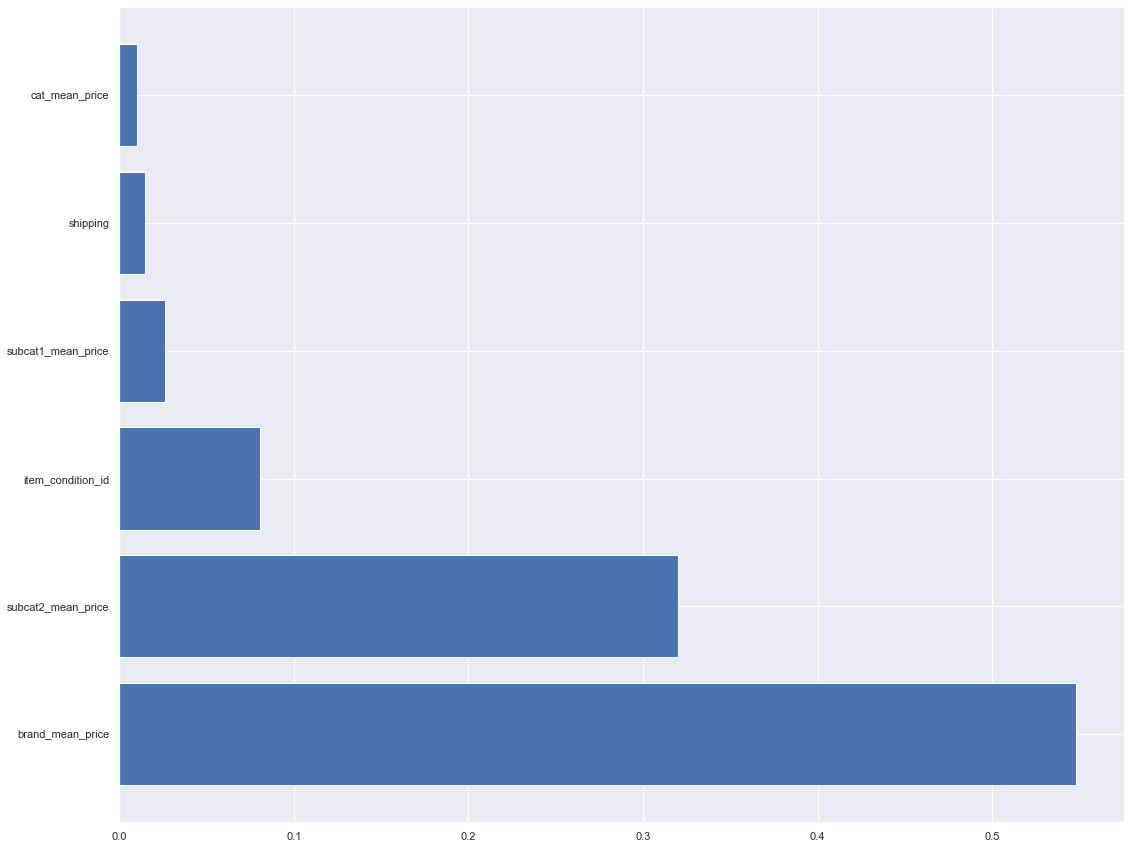

In [210]:
# Import matplotlib
import matplotlib.pyplot as plt

# Get the feature importances from the trained GradientBoostingRegressor object
importances = gb.feature_importances_

# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

# Create a horizontal bar plot of the feature importances
plt.barh(range(X_train.shape[1]), importances[indices], align='center')

# Add the feature names as labels of the bars
plt.yticks(range(X_train.shape[1]), X_train.columns[indices])

# Show the plot
plt.show()
